In [2]:
import pandas as pd
import numpy as np
from glob import glob
from pathlib import Path
from pydicom import dcmread
from skimage.io import imsave
from skimage.transform import resize
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

# Find some intersting imgs

In [3]:
paths = [Path(path) for path in glob('../manifest-1629068987406/CPTAC-UCEC/*/*/*')]
paths[:5]

[]

In [4]:
pd.Series([path.name.split('-')[1] for path in paths]).value_counts()

C:\Users\utilisateur\anaconda3\envs\mednist\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


Series([], dtype: int64)

In [5]:
[path for path in paths if path.name.split('-')[1] == 't1fl3dtra fsdyn CM']

[]

In [6]:
paths = glob('../manifest-1628532421892/CPTAC-UCEC/*/*/*-t1fl3dtra fsdyn CM-*/*')
len(paths)

5368

In [7]:
ds = dcmread(paths[0])
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.3320.3273.224956144320605773473047548340
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D', 'FM', 'FIL']
(0008, 0012) Instance Creation Date              DA: '20000108'
(0008, 0013) Instance Creation Time              TM: '065511.098000'
(0008, 0016) SOP Class UID                       UI: MR Ima

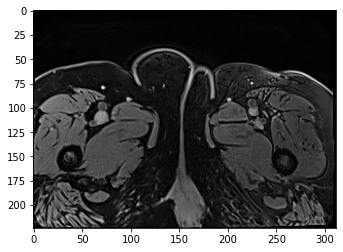

In [8]:
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)

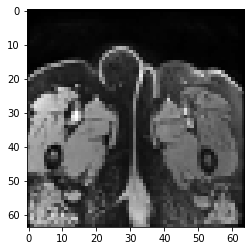

In [9]:
plt.imshow((resize(ds.pixel_array, (64,64))), cmap=plt.cm.gray) 

In [10]:
resize(ds.pixel_array, (64,64), preserve_range=True).max()

143.31250000000014

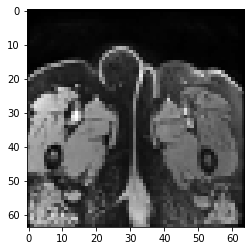

In [11]:
plt.imshow((resize(ds.pixel_array, (64,64), preserve_range=True)), cmap=plt.cm.gray) 

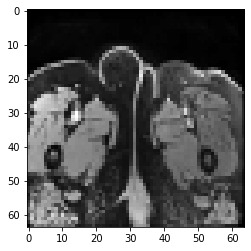

In [12]:
plt.imshow(resize(ds.pixel_array, (64,64), preserve_range=True).astype(np.uint8), cmap=plt.cm.gray) 

In [13]:
ds.pixel_array.max()

261

In [14]:
resize(ds.pixel_array, (64,64)).max()

0.0021868085755703077

In [15]:
rpaths = list(paths)
random.shuffle(rpaths)

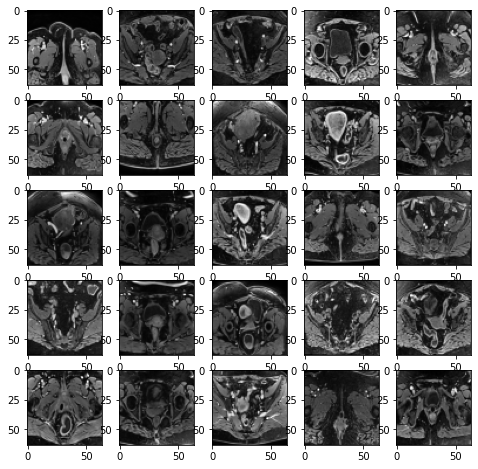

In [16]:
fig = plt.figure(figsize=(8, 8))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(resize(dcmread(rpaths.pop()).pixel_array, (64,64)), cmap='gray')
plt.show()

In [17]:
names = [str(dcmread(path).PatientName) for path in paths]
pd.Series(names).value_counts()

C3N-00858    624
C3N-01764    616
C3N-01172    528
C3N-01342    528
C3N-03417    528
C3N-01878    528
C3N-01879    528
C3N-01871    528
C3N-02639    480
C3N-02976    480
dtype: int64

In [18]:
for i, path in enumerate(paths):
    imsave(
        f'resized/Pelvis/{str(i).zfill(6)}.jpeg', 
        resize(dcmread(path).pixel_array, (64,64), preserve_range=True).astype(np.uint8))
    clear_output(wait=True)
    print(f'{i+1}/{len(paths)} ({(i+1)/len(paths)*100:.2f})')        

5368/5368 (100.00)
